In [0]:
!pip install kaggle

In [0]:
!pip install pillow==5.3.0

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"caroluslinus","key":"fb383503d0550cf1c1e1b0f9eadf6570"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle competitions download -c hackexpo2018
!chmod 600 /root/.kaggle/kaggle.json

  0% 0.00/34.4k [00:00<?, ?B/s]
100% 34.4k/34.4k [00:00<00:00, 21.7MB/s]
 65% 5.00M/7.74M [00:00<00:00, 52.0MB/s]
100% 7.74M/7.74M [00:00<00:00, 72.8MB/s]
 86% 30.0M/34.9M [00:00<00:00, 46.8MB/s]
100% 34.9M/34.9M [00:00<00:00, 133MB/s] 


In [0]:
!unzip train.zip

Archive:  train.zip
   creating: train/
   creating: train/3/
  inflating: train/3/250eb826-4a1b-4186-95bc-86ff113888eb.jpg  
  inflating: train/3/24d55352-b6dc-451f-897b-ce805c422903.jpg  
  inflating: train/3/23a54cdb-1cd7-4e45-9b29-eaf7579b4954.jpg  
  inflating: train/3/238f4e35-d269-4182-a887-bd685c92083d.jpg  
  inflating: train/3/22fa8ca0-3ab7-4076-bf64-86ba3970651a.jpg  
  inflating: train/3/22bb7860-f44a-4bad-b15b-05e09da9fd54.jpg  
  inflating: train/3/2287b20f-61f0-46d7-95d4-acdc32adcd9d.jpg  
  inflating: train/3/2258f9a7-5305-44cd-b4b6-b23bc478f20e.jpg  
  inflating: train/3/22104e50-0f98-4536-a40b-3b1a8f9539dc.jpg  
  inflating: train/3/220e96a4-4f96-40e3-81f4-1e945e7fc373.jpg  
  inflating: train/3/220e0b67-ed3e-44e9-b0ce-b20cb3b0bd14.jpg  
  inflating: train/3/21fceb29-b16b-4537-912e-03b31a137951.jpg  
  inflating: train/3/21f59dcf-2406-487b-850c-b1210812510d.jpg  
  inflating: train/3/21c19ebc-3256-4912-95cf-39cd1dc3c677.jpg  
  inflating: train/3/216aad5b-b924-43b7-a6

In [0]:
!unzip test.zip

Archive:  test.zip
   creating: test/
  inflating: test/00525fa2-c886-4f4d-8bf7-fbb72c6185f5.jpg  
  inflating: test/00683a08-bafe-4569-9e60-138b1c33e377.jpg  
  inflating: test/007eef35-f0c8-406e-ab13-a53ff5f7135d.jpg  
  inflating: test/00b62a38-8eac-4a5f-92b4-cbe22bd86235.jpg  
  inflating: test/010aca1b-e14a-4ff8-9263-5a2a84e8ef7a.jpg  
  inflating: test/017c3e36-7f1d-41af-a55b-c8525efbbfdf.jpg  
  inflating: test/01a88749-ed93-4621-8ec3-65e0e6a6119c.jpg  
  inflating: test/01dacf74-f1d7-41bd-a534-8af7603cc574.jpg  
  inflating: test/023b70a2-fc47-4184-94e2-91ac0fe97e60.jpg  
  inflating: test/0348759a-5d99-4046-bdfc-583b0d9edcbd.jpg  
  inflating: test/036ef27a-6f27-4f5a-80af-0f51333a7f59.jpg  
  inflating: test/038c1fb0-b42e-47ef-b5f7-028fb8870f53.jpg  
  inflating: test/0473c445-4b68-4d9f-a52d-a9af9c7bebc5.jpg  
  inflating: test/04c40421-ec8f-48fb-80dc-38331fe1f3a9.jpg  
  inflating: test/057cb276-7369-4e21-bbc2-74004562a8e7.jpg  
  inflating: test/05afb08e-54d1-40e3-aec1-3f985

In [0]:
!mkdir testfolder

In [0]:
!mv test testfolder

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision


In [0]:
import torch

In [0]:
import numpy as np
import pandas as pd
import torchvision
from torchvision import datasets,models
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler


In [0]:
batch_size=64
validation_size=0.2
transform=transforms.Compose([transforms.Resize((224,224)),
                              transforms.RandomHorizontalFlip(),
                              transforms.RandomRotation(10),
                              transforms.ToTensor(),
                             transforms.Normalize((0.485,0.456,0.406),(0.229,0.224,0.225))])

In [0]:
train_data=datasets.ImageFolder('train',transform=transform)
test_data=datasets.ImageFolder('testfolder',transform=transform)

In [0]:
train_length=len(train_data)
indices = list(range(train_length))
np.random.shuffle(indices)
split = int(np.floor(validation_size * train_length))

In [0]:
import numpy as np
import pandas as pd
import torchvision
from torchvision import datasets,models
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
train_idx, valid_idx = indices[split:], indices[:split]

In [0]:
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

In [0]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=0)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=0)

In [0]:
test_loader = torch.utils.data.DataLoader(test_data,batch_size=800)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
dataiter = iter(train_loader)

In [0]:
dataiter = iter(train_loader)
images,labels=dataiter.next()


In [0]:
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 3, 224, 224])
torch.Size([64])


In [0]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))    

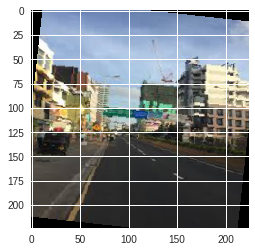

In [0]:
imshow(torchvision.utils.make_grid(images[0]))

In [0]:
import torch.nn.functional as F
from torch.autograd import Variable
from torch import optim

In [0]:
model= models.resnet50(pretrained=True)

In [0]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [0]:
for param in model.parameters():
  param.requires_grad=False

In [0]:
from torch import nn
classifier=nn.Sequential(nn.Linear(2048,512),
                         nn.ReLU(),
                         nn.Dropout(p=0.33),
                         nn.Linear(512,512),
                         nn.ReLU(),
                         nn.Dropout(p=0.28),
                         nn.Linear(512,512),
                         nn.ReLU(),
                         nn.Dropout(p=0.23),
                         nn.Linear(512,4),
                         nn.LogSoftmax(dim=1))

In [0]:
model.fc=classifier

In [0]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.fc.parameters(), lr=0.003)

In [0]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

#number of epocs
n_epochs = 100

# initialize tracker for minimum validation loss
valid_loss_min = np.Inf # set initial "min" to infinity

for epoch in range(n_epochs):
    train_loss = 0.0
    valid_loss = 0.0
    
    # train the model #
    model.train() 
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
  
    # validate the model #
    
    model.eval() 
    for data, target in valid_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        loss = criterion(output, target)
        valid_loss += loss.item()*data.size(0)
        
    # print training/validation statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch+1, 
        train_loss,
        valid_loss
        ))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'HackExpoModels.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 1.091843 	Validation Loss: 0.271703
Validation loss decreased (inf --> 0.271703).  Saving model ...
Epoch: 2 	Training Loss: 1.088861 	Validation Loss: 0.270839
Validation loss decreased (0.271703 --> 0.270839).  Saving model ...
Epoch: 3 	Training Loss: 1.086140 	Validation Loss: 0.269775
Validation loss decreased (0.270839 --> 0.269775).  Saving model ...
Epoch: 4 	Training Loss: 1.082390 	Validation Loss: 0.268430
Validation loss decreased (0.269775 --> 0.268430).  Saving model ...
Epoch: 5 	Training Loss: 1.077479 	Validation Loss: 0.267084
Validation loss decreased (0.268430 --> 0.267084).  Saving model ...
Epoch: 6 	Training Loss: 1.073022 	Validation Loss: 0.265423
Validation loss decreased (0.267084 --> 0.265423).  Saving model ...
Epoch: 7 	Training Loss: 1.067551 	Validation Loss: 0.263788
Validation loss decreased (0.265423 --> 0.263788).  Saving model ...
Epoch: 8 	Training Loss: 1.060791 	Validation Loss: 0.261617
Validation loss decreased (0.26378

KeyboardInterrupt: ignored

In [0]:
!pip3 install torchfusion --upgrade

Requirement already up-to-date: torchfusion in /usr/local/lib/python3.6/dist-packages (0.3.3)


In [0]:
from torchfusion.layers import *
from torchfusion.learners import StandardLearner
import torchvision.transforms as transforms
from PIL import Image
import os

In [0]:
learner = StandardLearner(model)
learner.load_model("HackExpoModels.pt")

IMAGES_FOLDER = "testfolder/test"

IMAGES = os.listdir(IMAGES_FOLDER)
PREDICTIONS = []
transformim=transforms.Compose([transforms.Resize((224,224)),
                              transforms.ToTensor(),
                             transforms.Normalize((0.485,0.456,0.406),(0.229,0.224,0.225)),])
for image_file in IMAGES:
    image_file = os.path.join(IMAGES_FOLDER,image_file)
    img = Image.open(image_file).convert("RGB")
    
    #perform preprocessing
    img =transformim(img)
    
    #add batch dimension
    img = img.unsqueeze(0)
    
    prediction = learner.predict(img).argmax().item()
    
    #append predictions
    PREDICTIONS.append(prediction)
    
  

In [0]:
#PREDICTIONS

In [0]:
submission=pd.read_csv('sample-submission.csv')
for i in zip(IMAGES,PREDICTIONS):
  mask=submission['ImageID']==i[0]
  submission.loc[mask,'Category']=i[1]

In [0]:
submission.to_csv('latesub1',index=False)